### Steps Involved in EDA

- Loading the data
- Data Visualization
- Data Imputation
- Outlier Analysis
- Gathering Insights

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Reading the Dataset

In [4]:
data = pd.read_csv("christmas sales trends.csv")

In [5]:
data

TransactionID        Date  CustomerID  Age  Gender Location  ProductID  \
0                 1  24-12-2020         441   27   Other  City_15        106   
1                 2  18-11-2022         340   43    Male  City_13        816   
2                 3  26-12-2019          31   25   Other   City_7        508   
3                 4  13-11-2018          39   64    Male  City_20        710   
4                 5  13-12-2020         344   26   Other  City_10        687   
...             ...         ...         ...  ...     ...      ...        ...   
9995           9996  21-12-2022         245   25   Other  City_10         54   
9996           9997  24-11-2022         295   46  Female  City_17        324   
9997           9998  02-11-2021         202   46  Female  City_13        892   
9998           9999  11-11-2020         310   64   Other   City_8        237   
9999          10000  16-11-2022         469   39  Female  City_15        490   

         Category  Quantity  UnitPrice     PaymentType  PromotionApplied  \
0            Toys         5  96.786255     Credit Card             False   
1        Clothing         1  95.279579     Credit Card              True   
2        Clothing         2  52.371645     Credit Card             False   
3            Toys         5  63.647293      Debit Card             False   
4            Toys         3  57.384041            Cash             False   
...           ...       ...        ...             ...               ...   
9995  Decorations         1  91.072121     Credit Card             False   
9996  Electronics         1  41.538590      Debit Card              True   
9997         Food         3  24.561093            Cash              True   
9998  Electronics         3  20.334764  Online Payment              True   
9999  Electronics         4  82.007183            Cash              True   

      DiscountAmount  GiftWrap             Event  CustomerSatisfaction  \
0           0.000000     False               NaN                     5   
1           0.000000      True               NaN                     2   
2           0.000000     False  Christmas Market                     4   
3           0.000000      True               NaN                     1   
4           0.000000      True  Christmas Market                     4   
...              ...       ...               ...                   ...   
9995        9.107212      True      Black Friday                     4   
9996        4.153859      True      Black Friday                     2   
9997        7.368328      True      Black Friday                     2   
9998        0.000000      True  Christmas Market                     1   
9999        0.000000      True  Christmas Market                     2   

      ReturnFlag  
0          False  
1           True  
2          False  
3           True  
4          False  
...          ...  
9995       False  
9996        True  
9997       False  
9998       False  
9999        True  

[10000 rows x 17 columns]

# Read all columns

In [7]:
data.columns

Index(['TransactionID', 'Date', 'CustomerID', 'Age', 'Gender', 'Location',
       'ProductID', 'Category', 'Quantity', 'UnitPrice', 'PaymentType',
       'PromotionApplied', 'DiscountAmount', 'GiftWrap', 'Event',
       'CustomerSatisfaction', 'ReturnFlag'],
      dtype='object')

# information about the dataframe 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   CustomerID            10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Gender                10000 non-null  object 
 5   Location              10000 non-null  object 
 6   ProductID             10000 non-null  int64  
 7   Category              10000 non-null  object 
 8   Quantity              10000 non-null  int64  
 9   UnitPrice             10000 non-null  float64
 10  PaymentType           10000 non-null  object 
 11  PromotionApplied      10000 non-null  bool   
 12  DiscountAmount        10000 non-null  float64
 13  GiftWrap              10000 non-null  bool   
 14  Event                 7162 non-null   object 
 15  CustomerSatisfaction

# Shape of the dataframe 

In [11]:
data.shape

(10000, 17)

### Check the dimension like 64 which is helpful in preparing for data modelling

In [13]:
data.ndim

2

### Read first 5 Rows

In [15]:
data.head(5)

TransactionID        Date  CustomerID  Age Gender Location  ProductID  \
0              1  24-12-2020         441   27  Other  City_15        106   
1              2  18-11-2022         340   43   Male  City_13        816   
2              3  26-12-2019          31   25  Other   City_7        508   
3              4  13-11-2018          39   64   Male  City_20        710   
4              5  13-12-2020         344   26  Other  City_10        687   

   Category  Quantity  UnitPrice  PaymentType  PromotionApplied  \
0      Toys         5  96.786255  Credit Card             False   
1  Clothing         1  95.279579  Credit Card              True   
2  Clothing         2  52.371645  Credit Card             False   
3      Toys         5  63.647293   Debit Card             False   
4      Toys         3  57.384041         Cash             False   

   DiscountAmount  GiftWrap             Event  CustomerSatisfaction  \
0             0.0     False               NaN                     5   
1             0.0      True               NaN                     2   
2             0.0     False  Christmas Market                     4   
3             0.0      True               NaN                     1   
4             0.0      True  Christmas Market                     4   

   ReturnFlag  
0       False  
1        True  
2       False  
3        True  
4       False

In [16]:
data.tail(5)

TransactionID        Date  CustomerID  Age  Gender Location  ProductID  \
9995           9996  21-12-2022         245   25   Other  City_10         54   
9996           9997  24-11-2022         295   46  Female  City_17        324   
9997           9998  02-11-2021         202   46  Female  City_13        892   
9998           9999  11-11-2020         310   64   Other   City_8        237   
9999          10000  16-11-2022         469   39  Female  City_15        490   

         Category  Quantity  UnitPrice     PaymentType  PromotionApplied  \
9995  Decorations         1  91.072121     Credit Card             False   
9996  Electronics         1  41.538590      Debit Card              True   
9997         Food         3  24.561093            Cash              True   
9998  Electronics         3  20.334764  Online Payment              True   
9999  Electronics         4  82.007183            Cash              True   

      DiscountAmount  GiftWrap             Event  CustomerSatisfaction  \
9995        9.107212      True      Black Friday                     4   
9996        4.153859      True      Black Friday                     2   
9997        7.368328      True      Black Friday                     2   
9998        0.000000      True  Christmas Market                     1   
9999        0.000000      True  Christmas Market                     2   

      ReturnFlag  
9995       False  
9996        True  
9997       False  
9998       False  
9999        True

### Full Description

In [23]:
data.describe()

TransactionID   CustomerID           Age     ProductID      Quantity  \
count    10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean      5000.50000    251.93300     43.791700    500.234800      3.010600   
std       2886.89568    145.00392     15.366585    288.741317      1.404452   
min          1.00000      1.00000     18.000000      1.000000      1.000000   
25%       2500.75000    127.00000     30.000000    252.000000      2.000000   
50%       5000.50000    254.00000     44.000000    500.000000      3.000000   
75%       7500.25000    379.00000     57.000000    750.000000      4.000000   
max      10000.00000    500.00000     70.000000   1000.000000      5.000000   

          UnitPrice  DiscountAmount  CustomerSatisfaction  
count  10000.000000    10000.000000          10000.000000  
mean      54.962118        6.954545              2.982500  
std       26.239370       11.075408              1.419153  
min       10.003242        0.000000              1.000000  
25%       32.053314        0.000000              2.000000  
50%       55.035737        0.000000              3.000000  
75%       77.849652       10.407700              4.000000  
max       99.996579       49.945866              5.000000

# Data Cleaning

In [66]:
data.isnull().sum()

TransactionID              0
Date                       0
CustomerID                 0
Age                        0
Gender                     0
Location                   0
ProductID                  0
Category                   0
Quantity                   0
UnitPrice                  0
PaymentType                0
PromotionApplied           0
DiscountAmount             0
GiftWrap                   0
Event                   2838
CustomerSatisfaction       0
ReturnFlag                 0
dtype: int64

In [68]:
data.duplicated().sum()

0

In [70]:
data.nunique()

TransactionID           10000
Date                      366
CustomerID                500
Age                        53
Gender                      3
Location                   20
ProductID                1000
Category                    5
Quantity                    5
UnitPrice               10000
PaymentType                 4
PromotionApplied            2
DiscountAmount           4255
GiftWrap                    2
Event                       2
CustomerSatisfaction        5
ReturnFlag                  2
dtype: int64

In [72]:
data.drop('Event',axis=1,inplace=True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionID         10000 non-null  int64  
 1   Date                  10000 non-null  object 
 2   CustomerID            10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Gender                10000 non-null  object 
 5   Location              10000 non-null  object 
 6   ProductID             10000 non-null  int64  
 7   Category              10000 non-null  object 
 8   Quantity              10000 non-null  int64  
 9   UnitPrice             10000 non-null  float64
 10  PaymentType           10000 non-null  object 
 11  PromotionApplied      10000 non-null  bool   
 12  DiscountAmount        10000 non-null  float64
 13  GiftWrap              10000 non-null  bool   
 14  CustomerSatisfaction  10000 non-null  int64  
 15  ReturnFlag          

In [76]:
data.duplicated().sum()

0

# Distribution plot:

### 1. Distribution plots of 'Age' parameters

<Axes: xlabel='Age', ylabel='Density'>

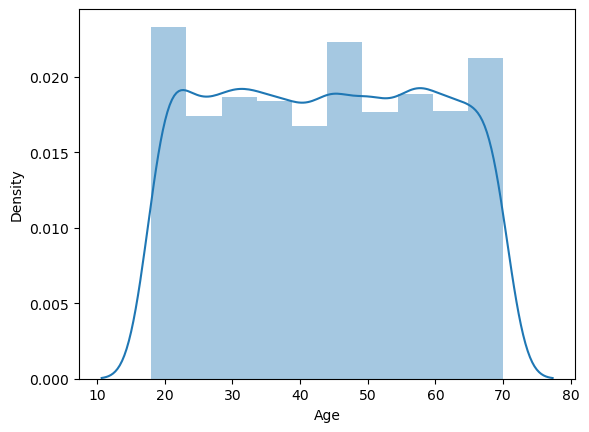

In [31]:
sns.distplot(data['Age'] , bins = 10)

# 2. Distribution plots of 'CustomerSatisfaction' parameters

<Axes: xlabel='CustomerSatisfaction', ylabel='Density'>

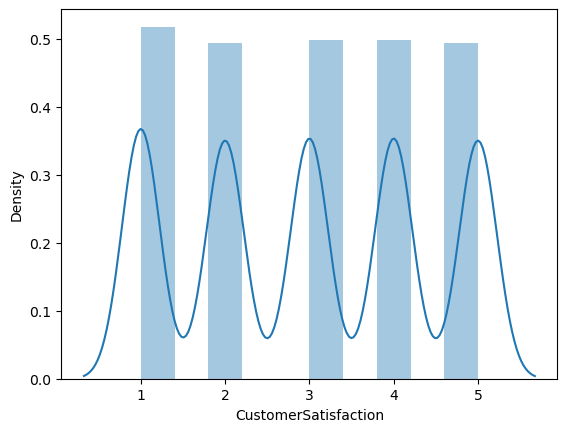

In [34]:
sns.distplot(data['CustomerSatisfaction'] , bins = 10)

# Distribution plots of 'ProductID' parameters

<Axes: xlabel='ProductID', ylabel='Density'>

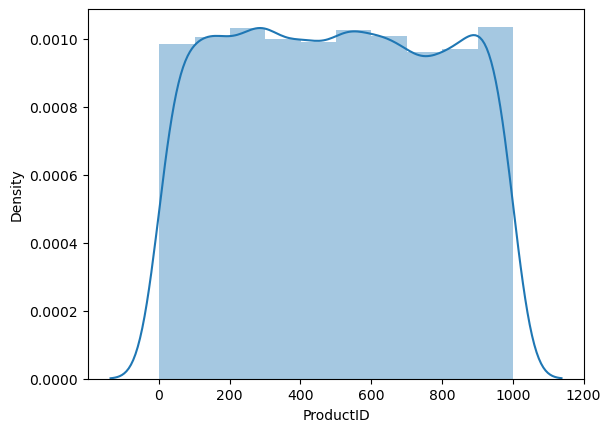

In [37]:
sns.distplot(data['ProductID'] , bins = 10)

# Heatmap

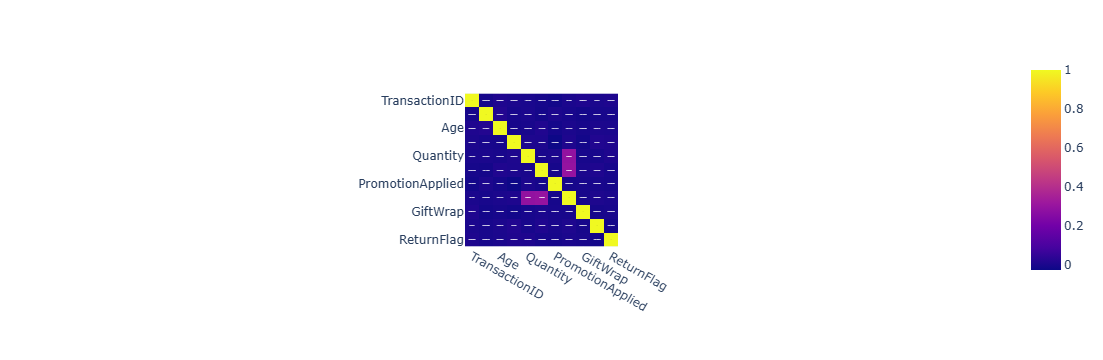

In [46]:
# HEatmap with Plotly...
a =data.corr(numeric_only=True)
px.imshow(a,text_auto=True)

# Pairplot

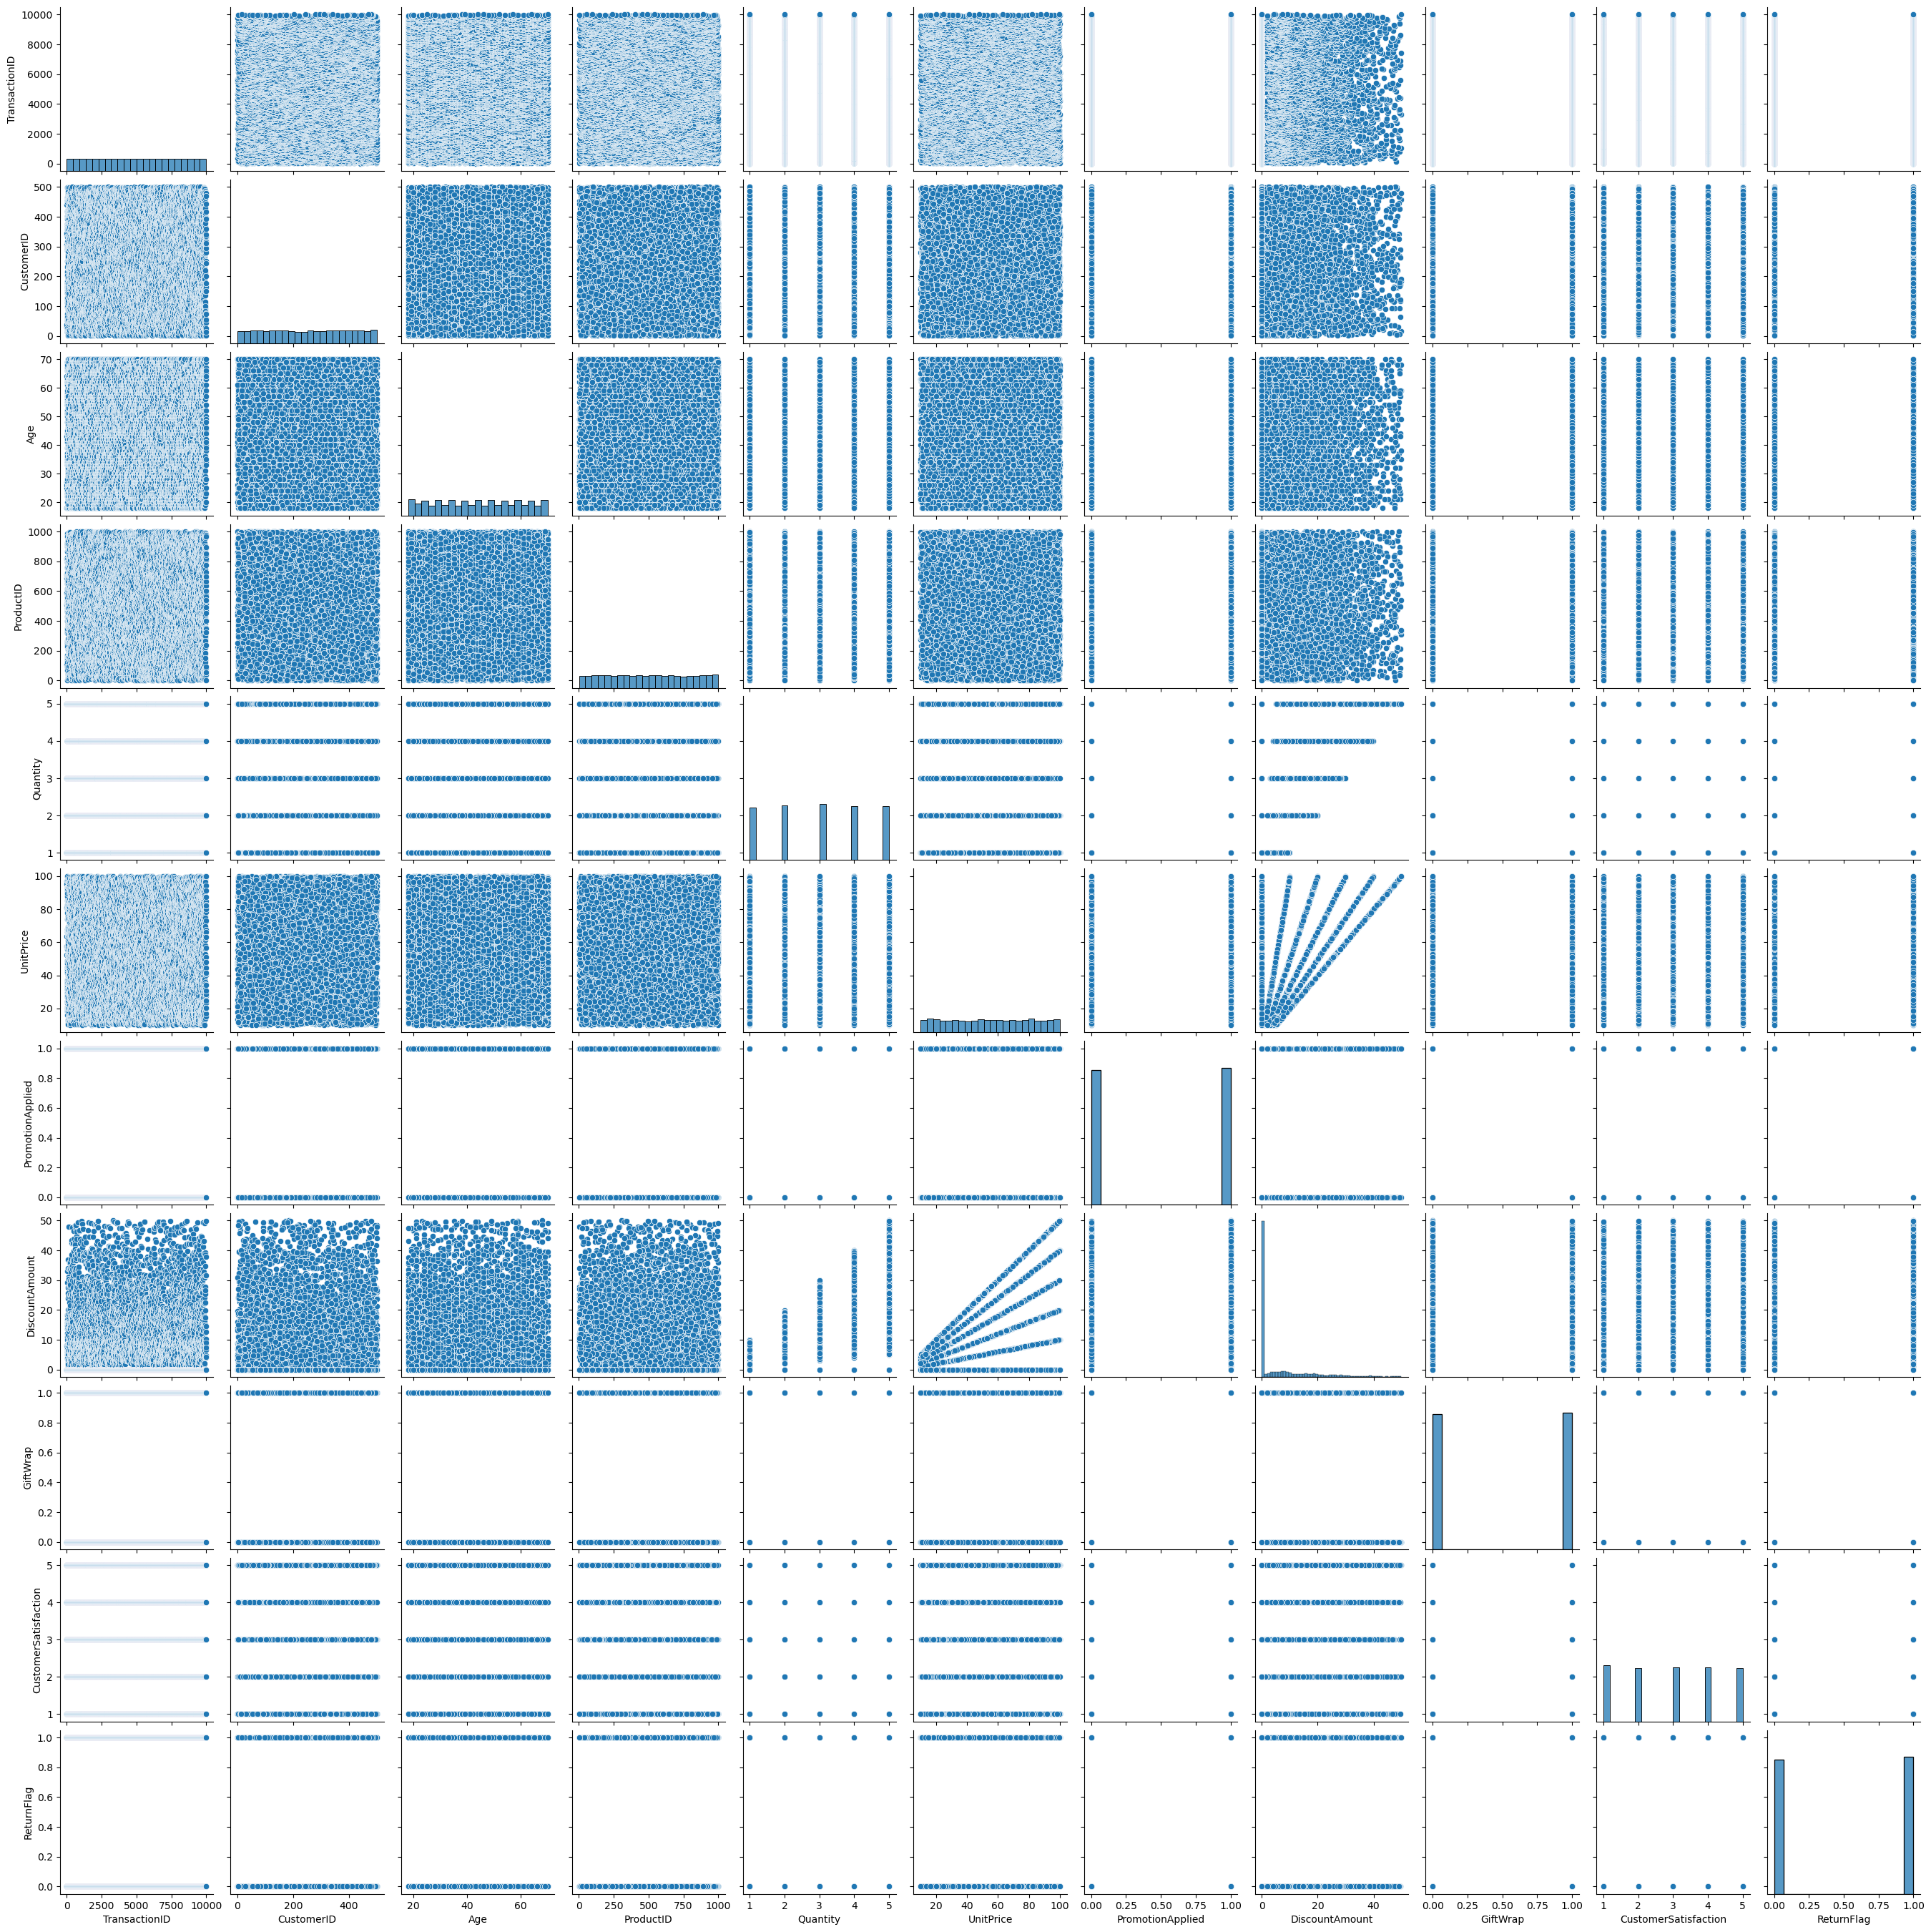

In [53]:
sns.pairplot(data)
plt.show()

# Histogram

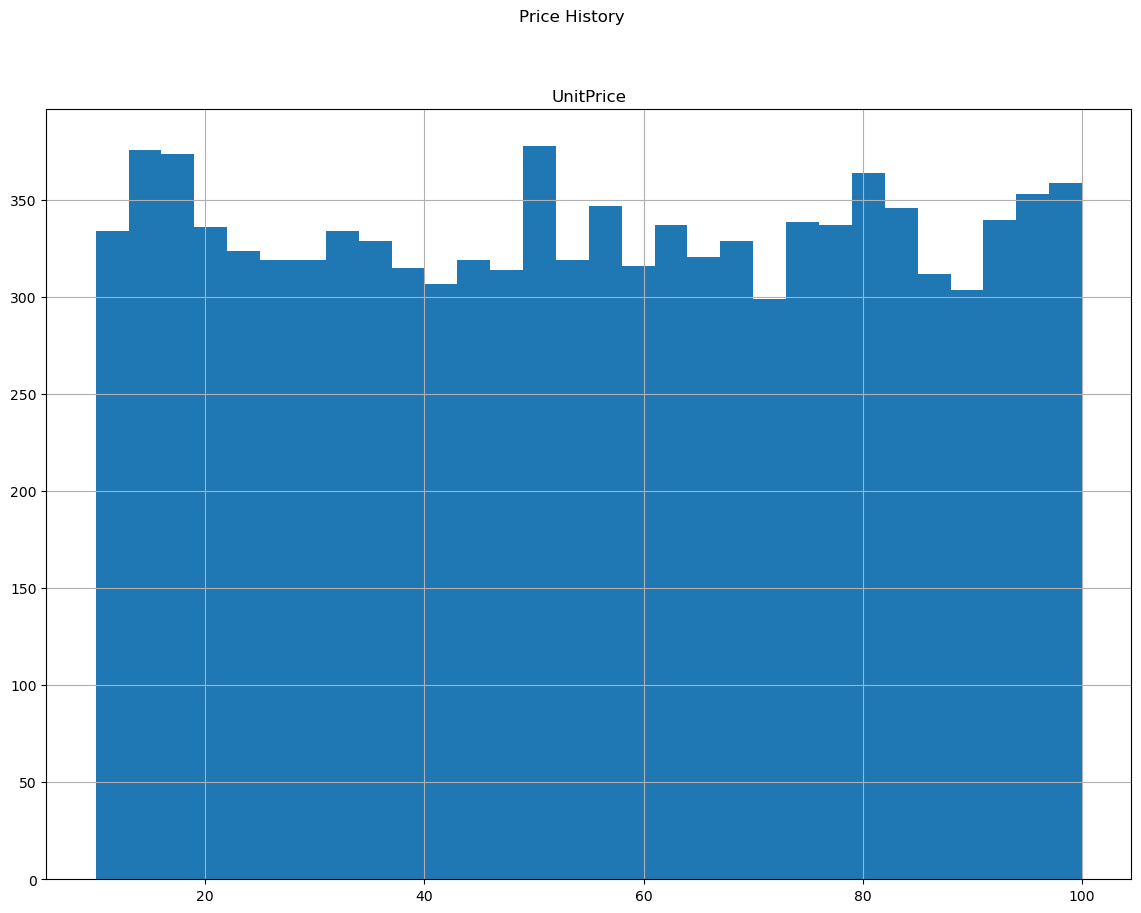

In [79]:
data[['UnitPrice']].hist(bins=30, figsize=(14, 10))
plt.suptitle('Price History')
plt.show()

# Bar Plot

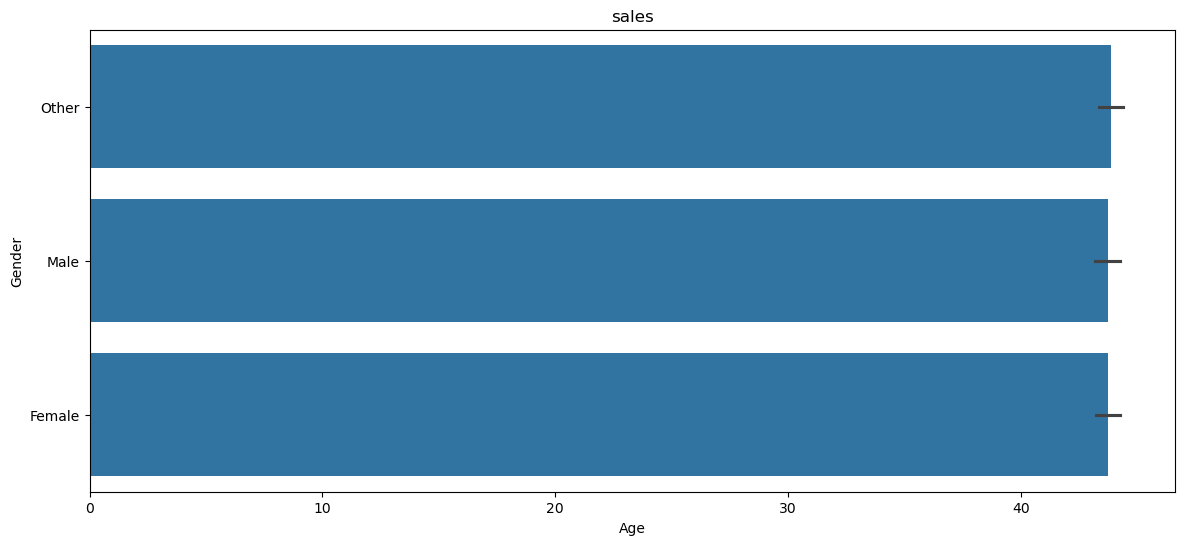

In [81]:
plt.figure(figsize=(14,6))
sns.barplot(data,x='Age',y='Gender')
plt.title('sales')
plt.show()

# Conclusion

The dataset includes the following columns:

TransactionID - Unique identifier for transactions.
Date - The date of the transaction.
CustomerID - Unique identifier for customers.
Age - Age of the customer.
Gender - Gender of the customer.
Location - City where the transaction took place.
ProductID - Unique identifier for products.
Category - Type of product (e.g., Toys, Clothing).
Quantity - Number of items purchased.
UnitPrice - Price per unit of the product.
PaymentType - Method of payment (e.g., Credit Card, Cash).
PromotionApplied - Whether a promotion was applied.
DiscountAmount - Amount of discount applied.
GiftWrap - Whether the item was gift-wrapped.
Event - Event associated with the purchase (e.g., Christmas Market).
CustomerSatisfaction - Customer satisfaction rating (1-5 scale).
ReturnFlag - Whether the item was returned.


1. Analyze sales during the Christmas season
I’ll filter the data for sales during the Christmas season (e.g., December) and visualize the trends.

2. Compare year-over-year Christmas sales trends
We’ll split the Christmas season sales by year to see how they changed.

3. Look at sales by product category during Christmas
Finally, we’ll break down sales into product categories for insights on popular items.